***Описание данных


**Данные для первой части
Файл /datasets/hypothesis.csv.


Hypothesis — краткое описание гипотезы;
Reach — охват пользователей по 10-балльной шкале;
Impact — влияние на пользователей по 10-балльной шкале;
Confidence — уверенность в гипотезе по 10-балльной шкале;
Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


**Данные для второй части
Файл /datasets/orders.csv. 
transactionId — идентификатор заказа;
visitorId — идентификатор пользователя, совершившего заказ;
date — дата, когда был совершён заказ;
revenue — выручка заказа;
group — группа A/B-теста, в которую попал заказ.
Файл /datasets/visitors.csv. Скачать датасет
date — дата;
group — группа A/B-теста;
visitors — количество пользователей в указанную дату в указанной группе A/B-теста


**Описание проекта


**Часть 1. Приоритизация гипотез.
В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
Задача
  - Примените фреймворк ICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Примените фреймворк RICE для приоритизации гипотез. Отсортируйте их по убыванию приоритета.
  - Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.


**Часть 2. Анализ A/B-теста
Вы провели A/B-тест и получили результаты, которые описаны в файлах /datasets/orders.csv и /datasets/visitors.csv.
Задача
Проанализируйте A/B-тест:

  2.1 Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
  
  2.2 Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
  
  2.3 Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
  
  2.4 Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.
  
  2.5 Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.
  
  2.6 Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
  
  2.7 Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
  
  2.8 Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
  
  2.9 Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
  
  2.10 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «сырым» данным. Сделайте выводы и предположения.
  
  2.11 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
  
  2.12 Посчитайте статистическую значимость различий в среднем количестве заказов между группами по «очищенным» данным. Сделайте выводы и предположения.
  
  2.13 Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.


**Примите решение по результатам теста и объясните его. 

**Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

<span style='color:blue'> Начинаю часть 1.
Приоритизирую по фреймворку ICE = impact * confidence / efforts</span>


In [39]:
import pandas as pd
import datetime as dt

In [2]:
hyp_data = pd.read_csv('hypothesis.csv', sep=',')
hyp_data['ICE'] = round(hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts'], 0)
display(hyp_data[['Hypothesis', 'ICE']].sort_values('ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.0
0,"Добавить два новых канала привлечения трафика,...",13.0
7,Добавить форму подписки на все основные страни...,11.0
6,Показать на главной странице баннеры с актуаль...,8.0
2,Добавить блоки рекомендаций товаров на сайт ин...,7.0
1,"Запустить собственную службу доставки, что сок...",2.0
3,"Изменить структура категорий, что увеличит кон...",1.0
4,"Изменить цвет фона главной страницы, чтобы уве...",1.0
5,"Добавить страницу отзывов клиентов о магазине,...",1.0


<span style='color:blue'> В результате применения способа ICE, можно выделить три наилучших гипотезы: №9 с коэффициентом 16, №1 с коэффициентом 13 и №8 с коэффициентом 11. Если есть ресурсы на проведение дополнительных тестов, то можно рассмотреть гипотезы №7 и №3</span>

<span style='color:blue'> Часть 1.
Приоритизирую по фреймворку RICE = reach * impact * confidence / efforts</span>

In [3]:
hyp_data['RICE'] = round(hyp_data['Reach'] * hyp_data['Impact'] * hyp_data['Confidence'] / hyp_data['Efforts'], 0)
display(hyp_data.sort_values('RICE', ascending=False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.0,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.0,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.0,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.0,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.0,16.0
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.0,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.0,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.0,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.0,3.0


<span style='color:blue'> В результате применения способа RICE лидерами стали гипотезы №8, №3 итретье место разделили гипотеза №1 и №7.
Гипотеза №8 стала лидером и по коэффициенту RICE в два раза превысила остальные, так как у данной гипотезы самый большой охват аудитории. Более того, параметр влияния изменений на аудиторию оценен на уровне 7, что тоже является значительны показателем и параметр  уверенности показывает хорошую уверенность в оценках др показателей. Также, усилия на проверку гипотезы оценены на среднем уровне. Все факторы в совокупности ясно дают понять, что в первую очередь необходимо проверить именно гипотезу №8 "Добавить форму подписки на все основные страницы..."
 - Гипотеза №9 проиграла, так как у нее очень низкий охват аудитории
 - Гипотеза №1 также имеет незначительный охват аудитории, но показатели влияния и уверенности довольно неплохие</span>

<span style='color:blue'> Часть 2.1
Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.</span>

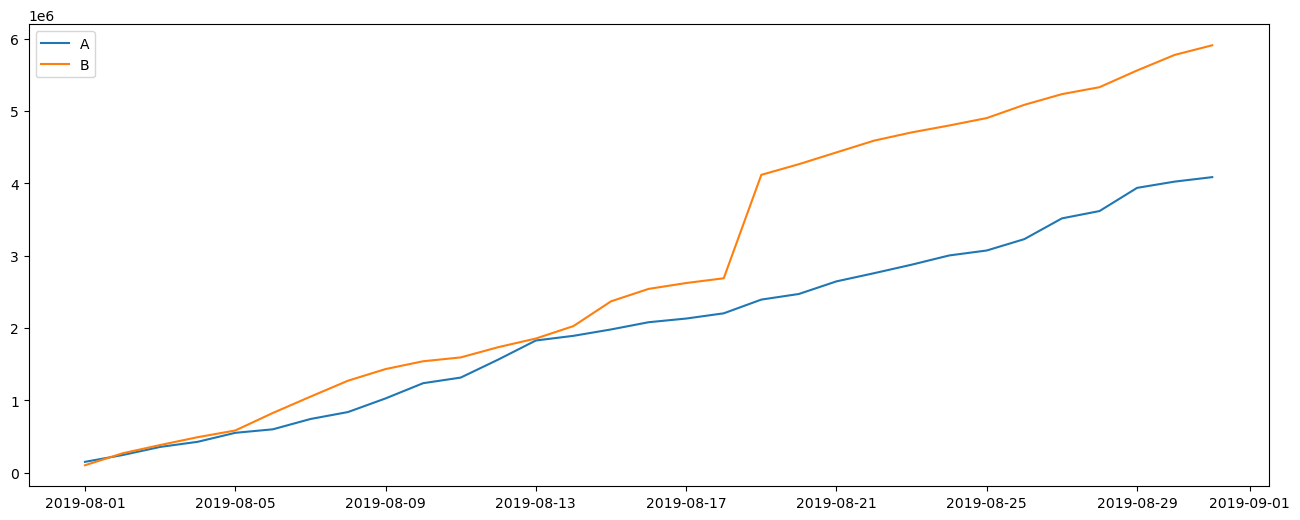

In [50]:
orders = pd.read_csv('orders.csv', sep=',')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors = pd.read_csv('visitors.csv', sep=',')
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))


import matplotlib.pyplot as plt
import numpy as np

datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date':'max', 'group':'max', 'transactionId':'nunique',
                                           'visitorId':'nunique', 'revenue':'sum'}), axis=1).sort_values(by=['date', 'group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                      .agg({'date':'max', 'group':'max', 'visitors':'sum'}), axis=1).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on = ['date', 'group'], right_on = ['date', 'group'])
cumulativeData.columns = ['date', 'group', 'transactions', 'buyers', 'revenue', 'visitors']

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][['date', 'revenue', 'transactions', 'buyers']]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][['date', 'revenue', 'transactions', 'buyers']]

plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend();

<span style='color:blue'> Показатели кумулятивной выручки для обоих групп плавно растут. После примерно второй недели теста выручка группы В превзашла значения выручки группы А и продолжала увеличиваться. На 18 день наблюдается резкий скачок выручки в группе В, возможно имеет место быть аномалия.</span>

<span style='color:blue'> Часть 2.2
Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.</span>

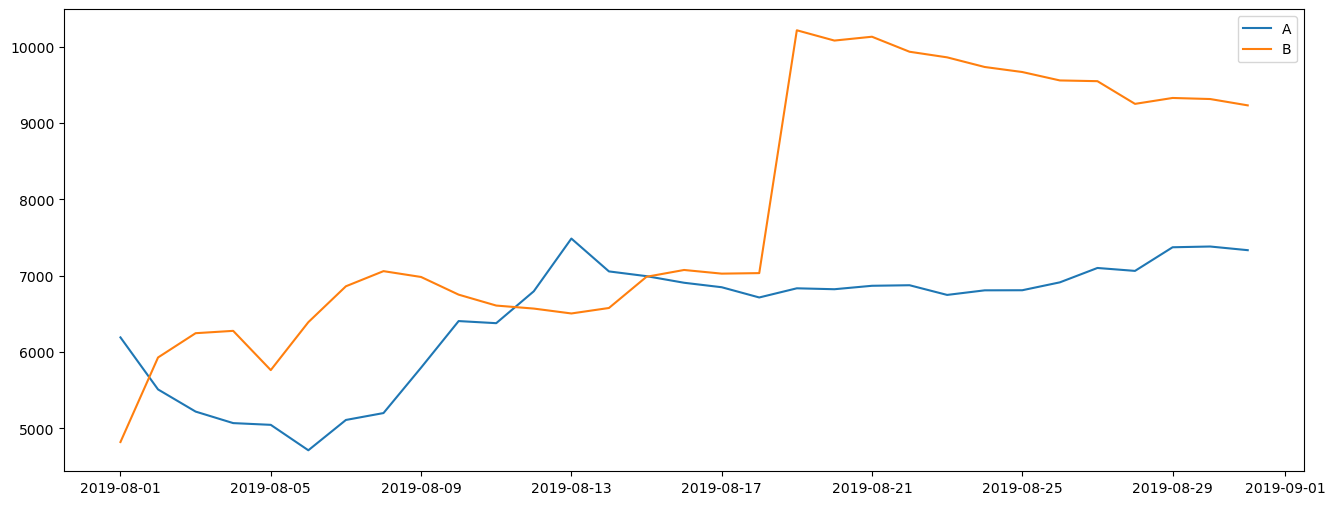

In [45]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['transactions'], label = 'A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['transactions'], label = 'B')
plt.legend();

<span style='color:blue'> График кумулятивного среднего чека довольно волатильный. Для группы А в первую неделю средний чек падал, однако во вторую неделю возрастал и к концу теста закрепился на уровне 7000. Кривая группы В показывает волнообразное движение, также подтвердилась гипотеза аномальных данных на 18 день, и к концу теста можно наблюдать небольшое снижение среднего чека к уровню 9000-9500.</span>

<span style='color:blue'> Часть 2.3 
Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.</span>

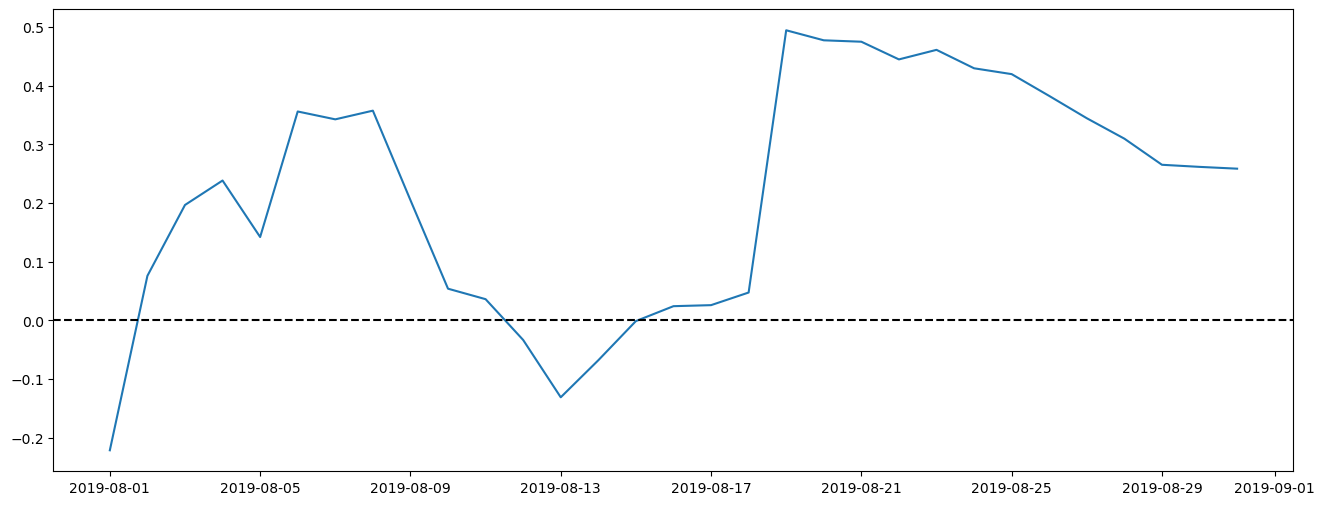

In [53]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',
                                                   right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16,6))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transactionsB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transactionsA']) - 1)
plt.axhline(y=0, color='black', linestyle='--');

<span style='color:blue'> График различия между сегментами сильно скачет. Мозможно в данных есть выбросы.</span>

<span style='color:blue'> Часть 2.4 
Постройте график кумулятивного среднего количества заказов по группам. Сделайте выводы и предположения.</span>

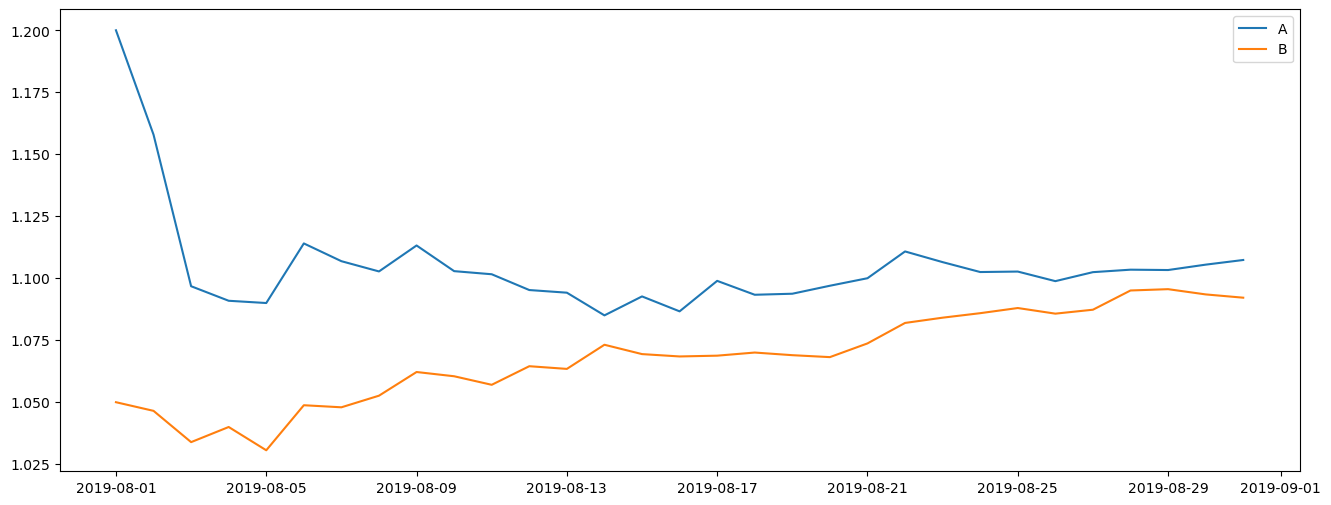

In [52]:
plt.figure(figsize=(16,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['transactions'] / cumulativeRevenueA['buyers'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['transactions'] / cumulativeRevenueB['buyers'], label='B')
plt.legend();

<span style='color:blue'> В отношении среднего количества заказов группа А превышает значения группы В. Однако, у группы В можно наблюдать незначительный рост показателя, тогда как значения группы А остаются примерно на одном уровне (от 1.10 до 1.15)</span>

<span style='color:blue'>Часть 2.5
Постройте график относительного изменения кумулятивного среднего количества заказов группы B к группе A. Сделайте выводы и предположения.</span>

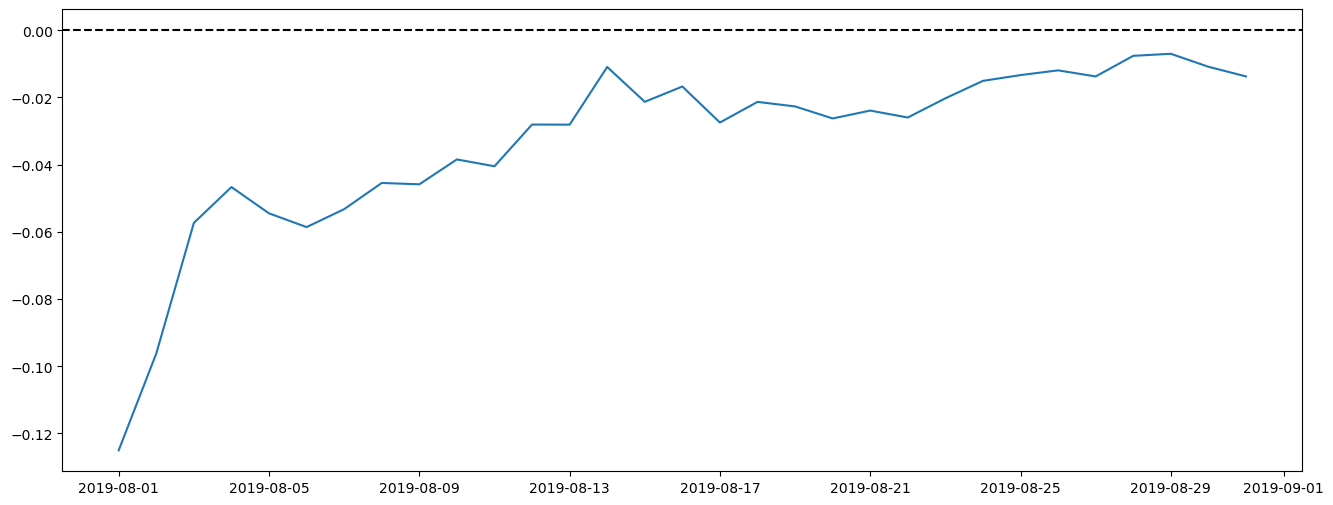

In [54]:
plt.figure(figsize=(16,6))
plt.plot(mergedCumulativeRevenue['date'],
         (mergedCumulativeRevenue['transactionsB']/mergedCumulativeRevenue['buyersB'])
         /(mergedCumulativeRevenue['transactionsA']/mergedCumulativeRevenue['buyersA']) - 1)
plt.axhline(y=0, color='black', linestyle='--');

<span style='color:blue'> График различия между сегментами показывает постепенное увеличение количества заказов в группе В,однако всё ещё видно отставание от группы А на 0.02 пп.</span>